# RANDOM FOREST

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [3]:
rf = RandomForestClassifier()
rf_parameters = {'n_estimators': [100, 200, 300]}
cross_val = KFold(n_splits=5)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
rf_grid_result = rf_grid_search.fit(features_train, labels_train)
# summarize results
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
print("Average AUC for Random Forest: ", np.mean(rf_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Random Forest: ", np.mean(rf_grid_result.cv_results_['mean_test_accuracy']))

Best: 0.692967 using {'n_estimators': 300}
Average AUC for Random Forest:  0.6856300984567535
Average Accuracy for Random Forest:  0.9870413210470081


In [4]:
results = pd.DataFrame(rf_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of a Random Forest with K-Fold-Cross Validation\n')]

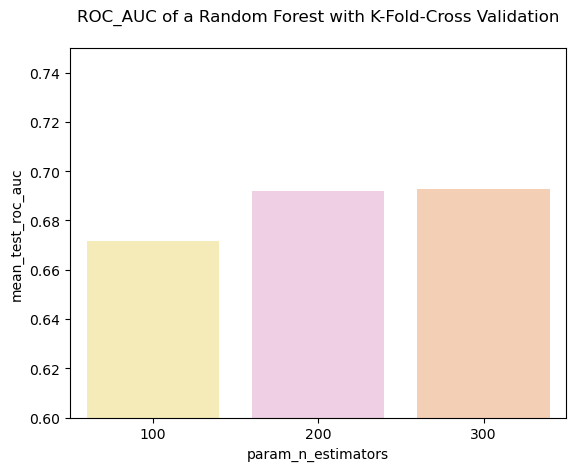

In [7]:
plot = sns.barplot(data=results, x='param_n_estimators', y='mean_test_roc_auc', palette='Pastel2_r')
plot.set(ylim=(0.6, 0.75))
plot.set(title='ROC_AUC of a Random Forest with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of a Random Forest with K-Fold-Cross Validation\n')]

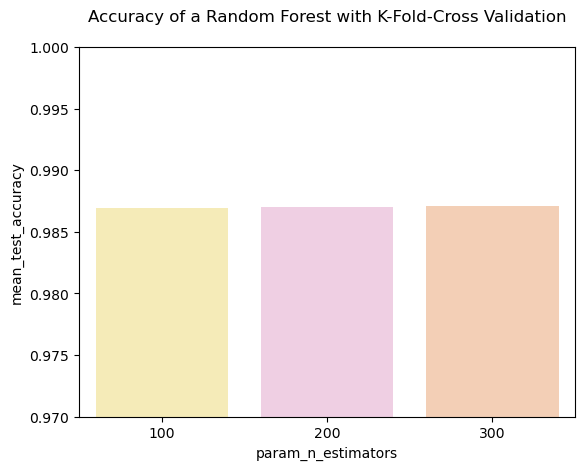

In [8]:
plot = sns.barplot(data=results, x='param_n_estimators', y='mean_test_accuracy', palette='Pastel2_r')
plot.set(ylim=(0.97, 1))
plot.set(title='Accuracy of a Random Forest with K-Fold-Cross Validation\n')